# Ternary Plotting in Python

Let's explore some basic functionality and examples of the `ternary` library, available at [Github](https://github.com/marcharper/python-ternary).

In [1]:
%matplotlib inline

import ternary

print("Version", ternary.__version__)

Version 1.0.7


In [2]:
# Make images higher resolution and set default size
import matplotlib
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['figure.figsize'] = (4, 4)

The `ternary` library wraps its plotting functions are matplotlib. You can ask ternary for a plotting axes object or wrap an existing matplotlib axes. Our first example draws a ternary boundary and some inner grid lines, as well as some labels (you can use LaTeX just like in matplotlib).

You can use `offset` parameters to adjust the distances of the axes ticks and labels, which is useful for labels that have unusual symbols or if you otherwise modify the default style significantly.

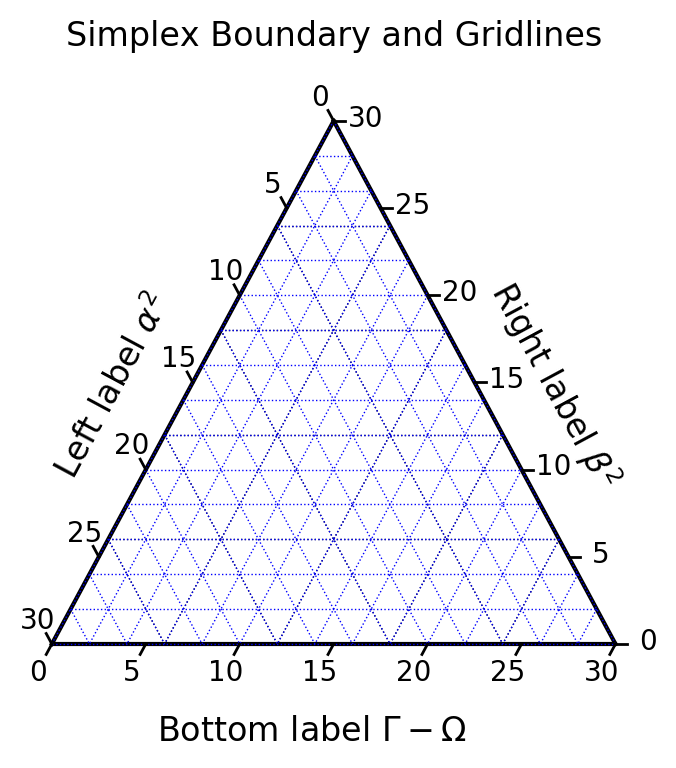

In [3]:
## Boundary and Gridlines
scale = 30
figure, tax = ternary.figure(scale=scale)

# Draw Boundary and Gridlines
tax.boundary(linewidth=1.5)
tax.gridlines(color="black", multiple=6)
tax.gridlines(color="blue", multiple=2, linewidth=0.5)

# Set Axis labels and Title
fontsize = 12
offset = 0.14
tax.set_title("Simplex Boundary and Gridlines\n", fontsize=fontsize)
tax.left_axis_label("Left label $\\alpha^2$", fontsize=fontsize, offset=offset)
tax.right_axis_label("Right label $\\beta^2$", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("Bottom label $\\Gamma - \\Omega$", fontsize=fontsize, offset=offset)

# Set ticks
tax.ticks(axis='lbr', linewidth=1, multiple=5, offset=0.02)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

ternary.plt.show()

Ternary provides functions to plot points and lines, and will do all the necessary projecting for you.

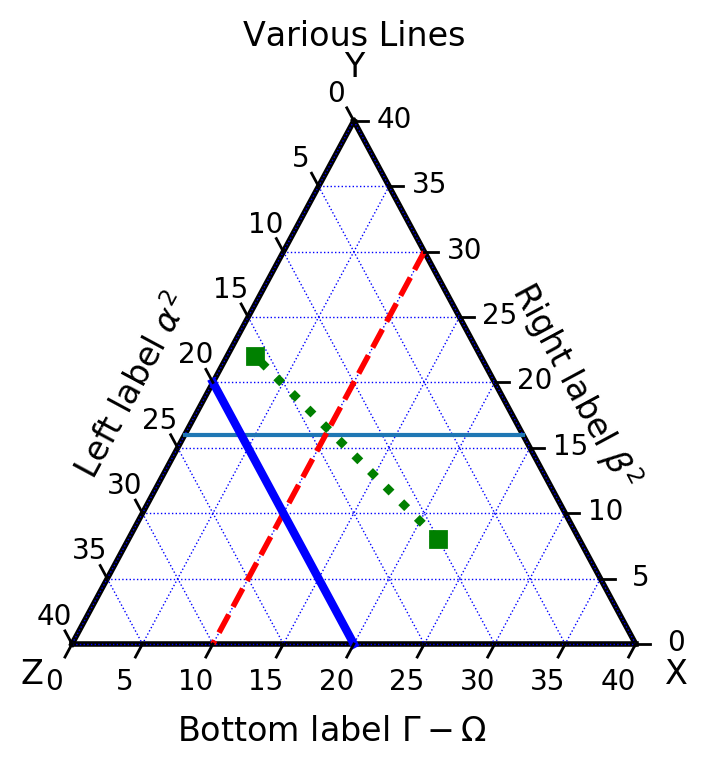

In [4]:
import ternary

scale = 40
figure, tax = ternary.figure(scale=scale)
# figure.set_size_inches(10, 10)

# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)
tax.gridlines(color="blue", multiple=5)

# Set Axis labels and Title
fontsize = 12
offset = 0.14
tax.set_title("Various Lines\n", fontsize=fontsize)
tax.right_corner_label("X", fontsize=fontsize)
tax.top_corner_label("Y", fontsize=fontsize)
tax.left_corner_label("Z", fontsize=fontsize)
tax.left_axis_label("Left label $\\alpha^2$", fontsize=fontsize, offset=offset)
tax.right_axis_label("Right label $\\beta^2$", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("Bottom label $\\Gamma - \\Omega$", fontsize=fontsize, offset=offset)

# Draw lines parallel to the axes
tax.horizontal_line(16)
tax.left_parallel_line(10, linewidth=2., color='red', linestyle="--")
tax.right_parallel_line(20, linewidth=3., color='blue')
# Draw an arbitrary line, ternary will project the points for you
p1 = (22, 8, 10)
p2 = (2, 22, 16)
tax.line(p1, p2, linewidth=3., marker='s', color='green', linestyle=":")

tax.ticks(axis='lbr', multiple=5, linewidth=1, offset=0.025)
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

tax.show()

You can also plot curves and make scatter plots (ternary will project each point).

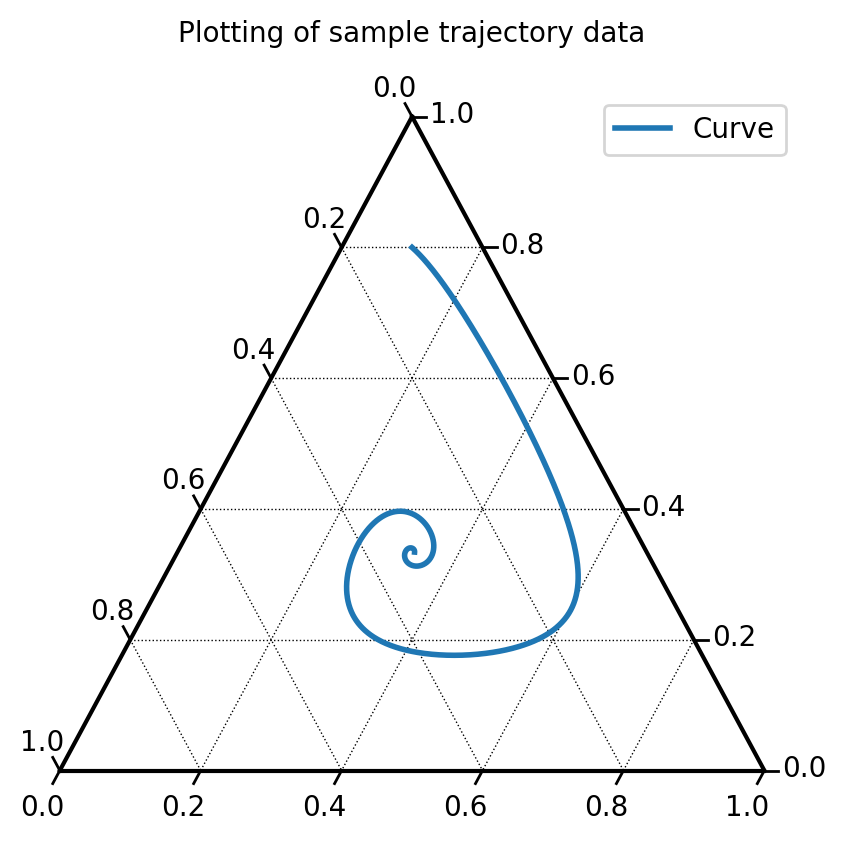

In [5]:
# Load some data, tuples (x,y,z)
points = []
with open("sample_data/curve.txt") as handle:
    for line in handle:
        points.append(list(map(float, line.split(' '))))

## Sample trajectory plot
figure, tax = ternary.figure(scale=1.0)
figure.set_size_inches(5, 5)

tax.boundary()
tax.gridlines(multiple=0.2, color="black")
tax.set_title("Plotting of sample trajectory data\n", fontsize=10)

# Plot the data
tax.plot(points, linewidth=2.0, label="Curve")
tax.ticks(axis='lbr', multiple=0.2, linewidth=1, tick_formats="%.1f", offset=0.02)

tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.legend()
tax.show()

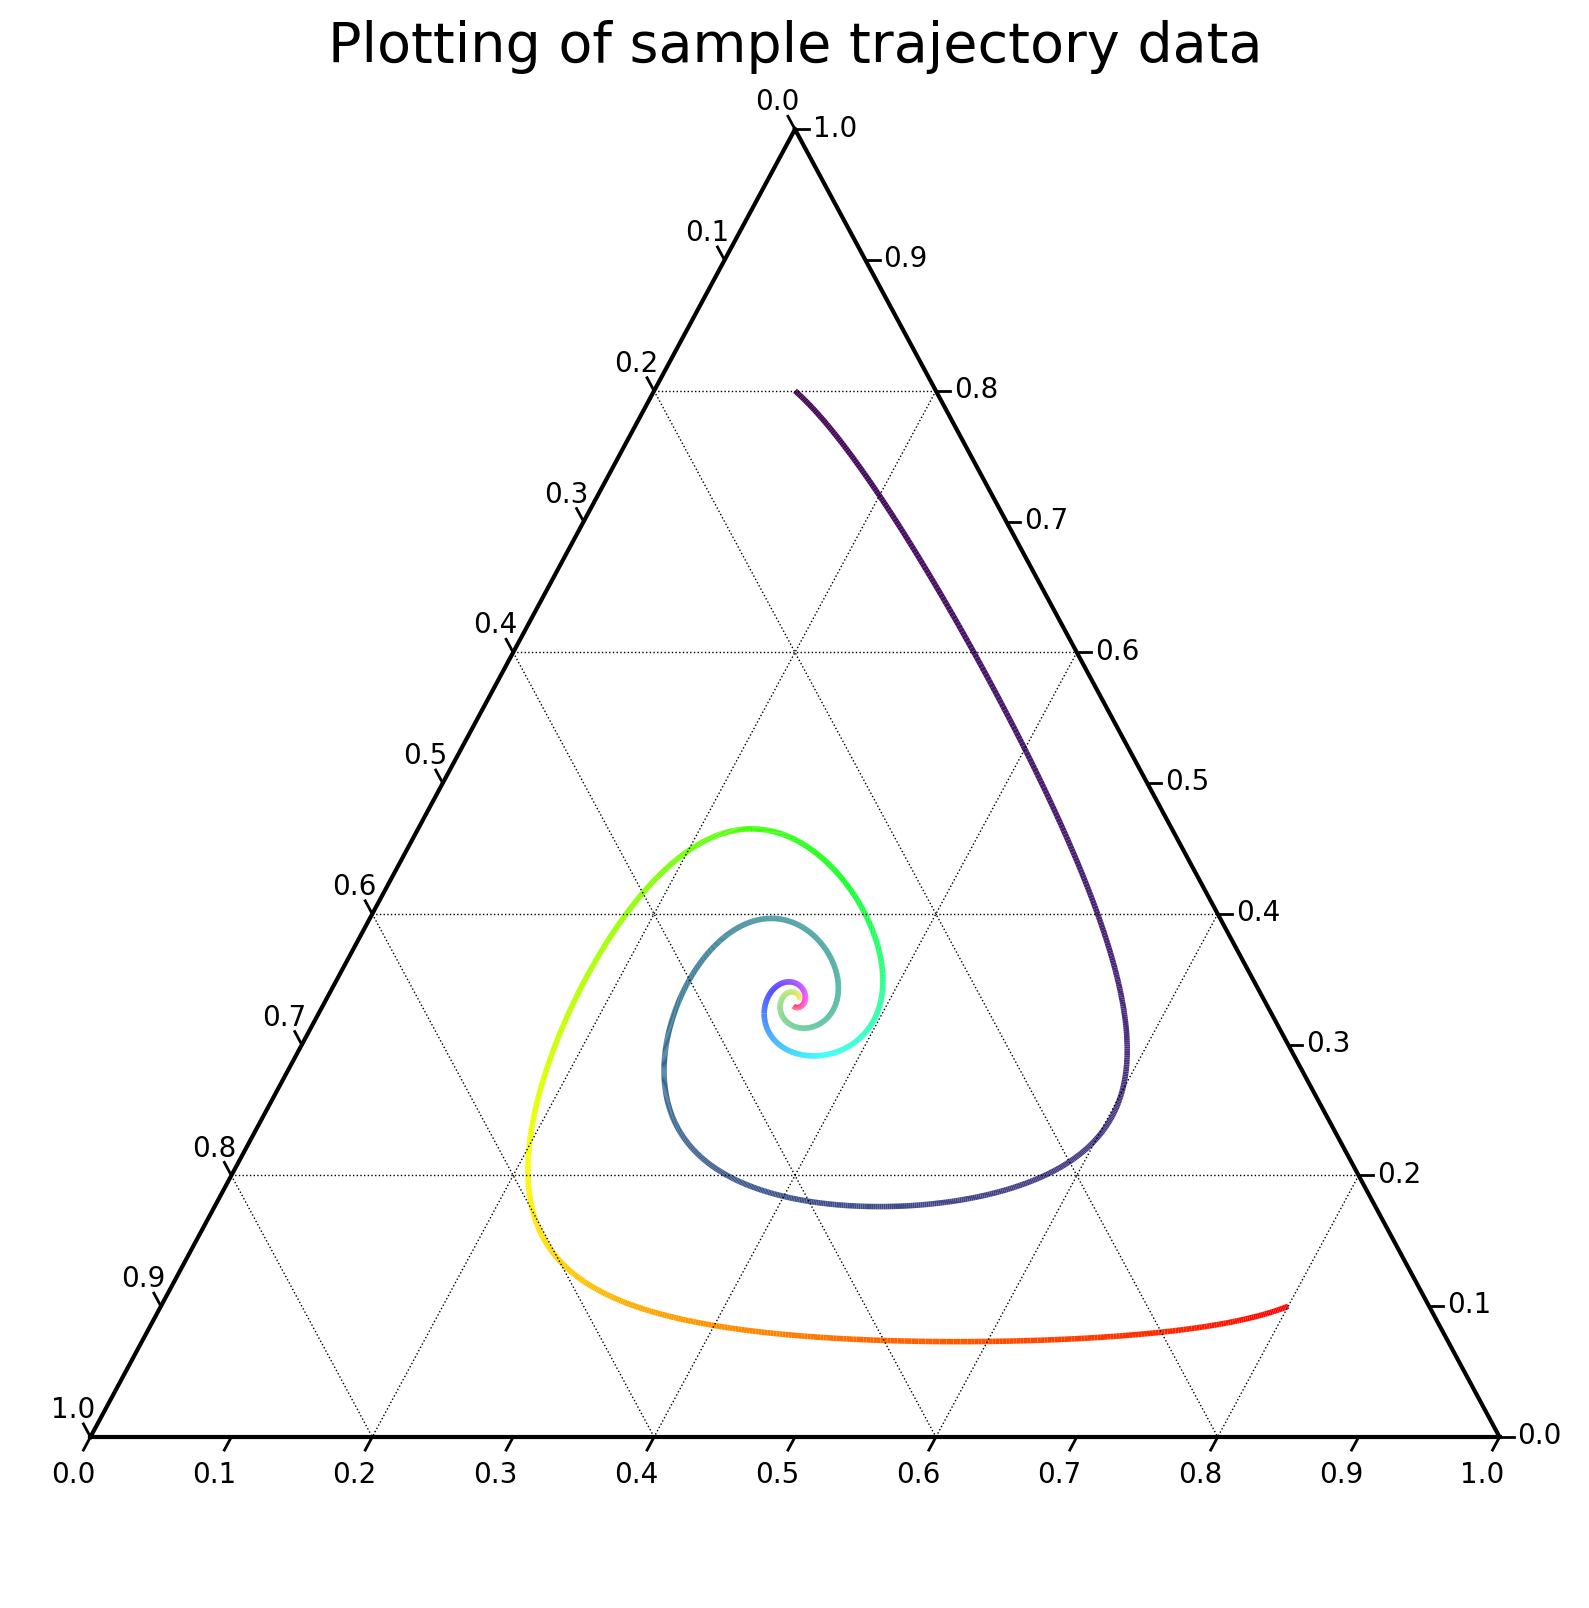

In [6]:
# Using same points as above
# Load some data, tuples (x,y,z)
points = []
with open("sample_data/curve.txt") as handle:
    for line in handle:
        points.append(list(map(float, line.split(' '))))


fig, tax = ternary.figure(scale=1.0)
fig.set_size_inches(10, 10)

tax.plot_colored_trajectory(points, linewidth=2.0)

## Shuffle points for additional plot
points = [(y, z, x) for (x, y, z) in points]
tax.plot_colored_trajectory(points, cmap="hsv", linewidth=2.0)

tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.ticks(axis='lbr', linewidth=1, multiple=0.1, tick_formats="%.1f")
tax.boundary()
tax.set_title("Plotting of sample trajectory data", fontsize=20)
tax.gridlines(multiple=0.2, color="black")
tax.show()

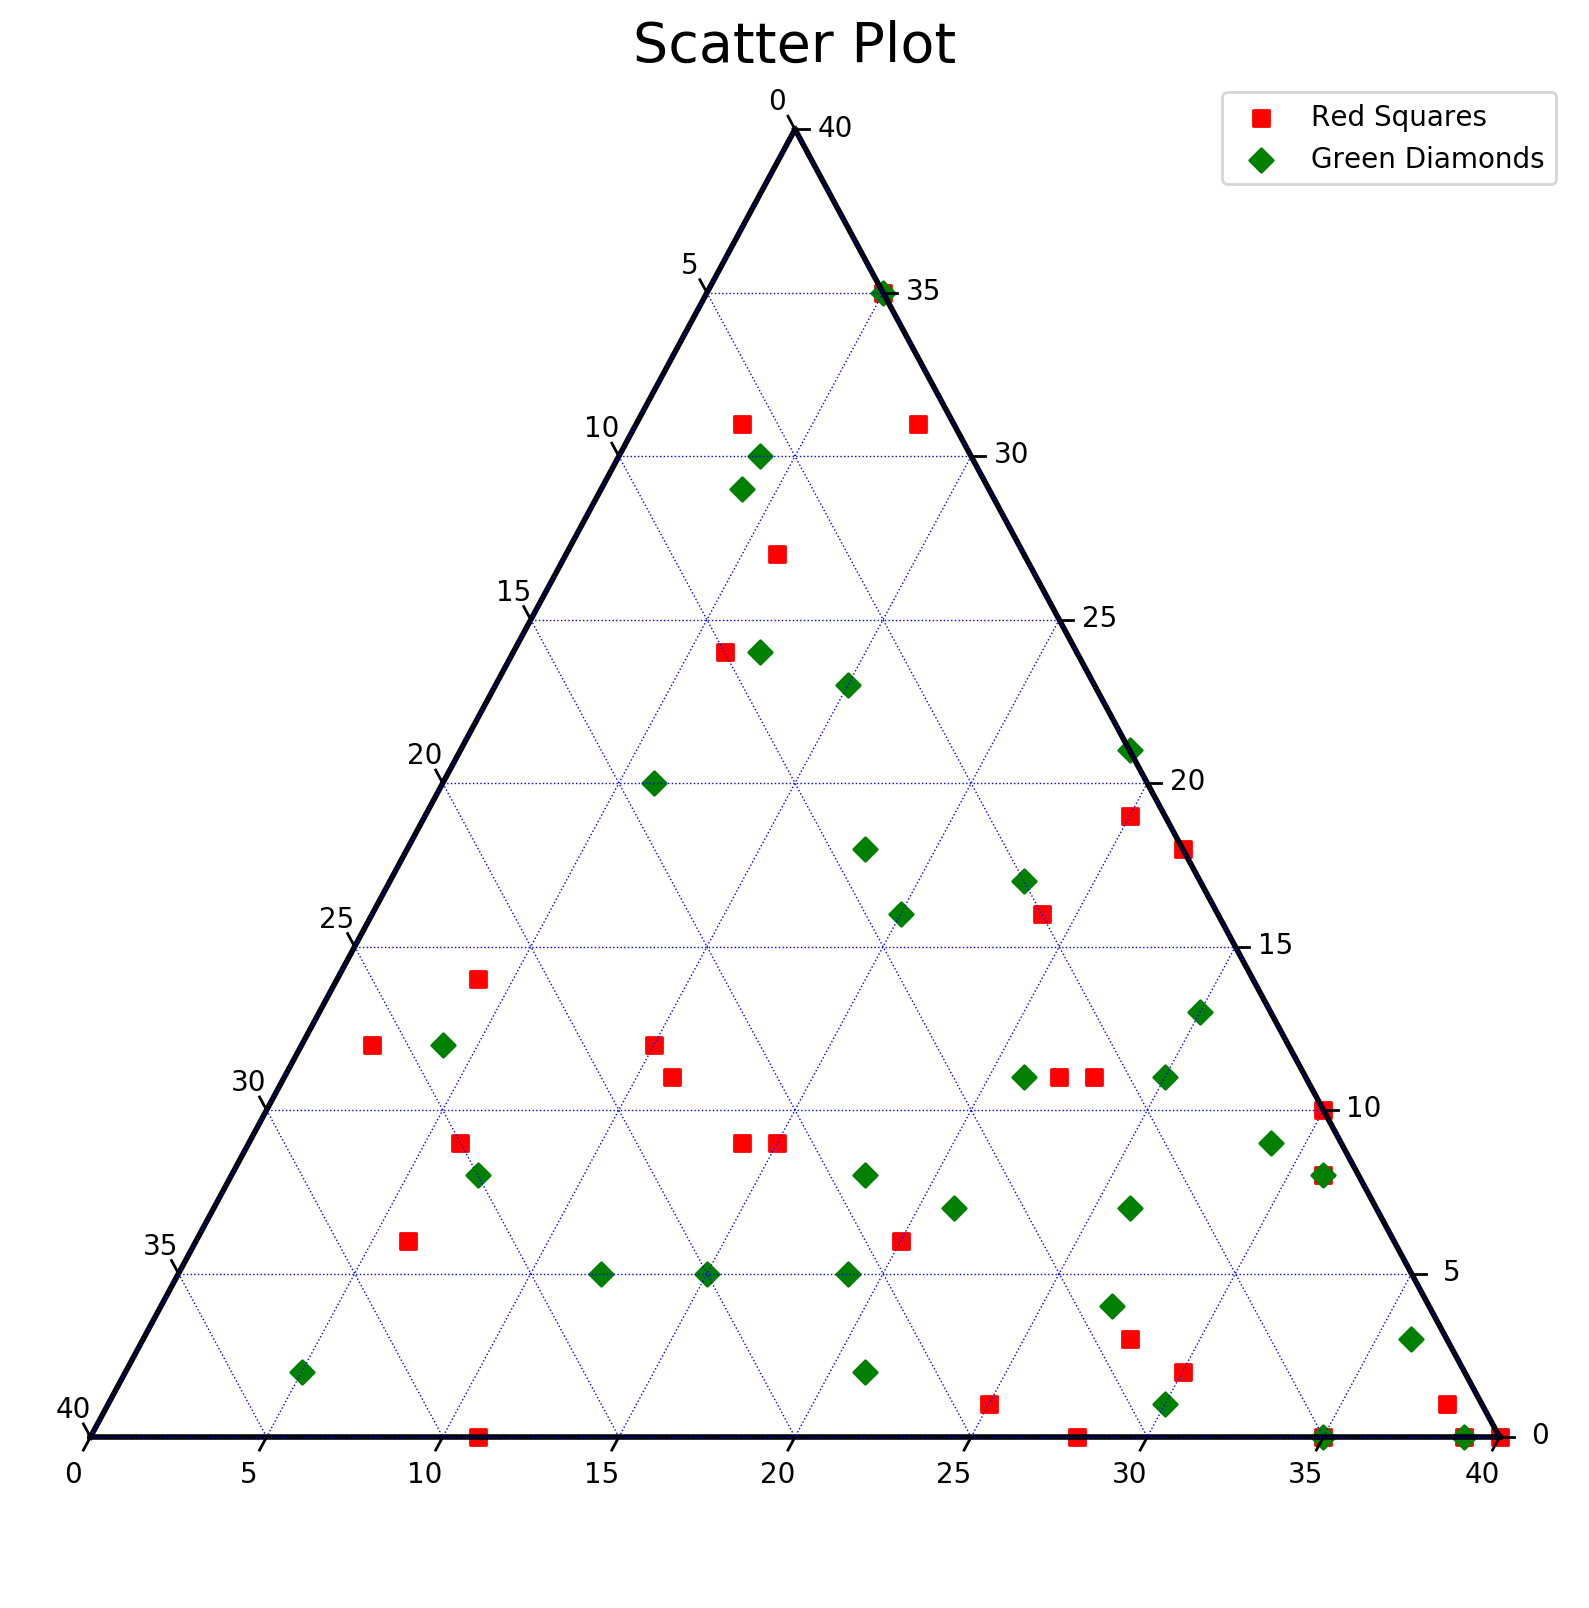

In [7]:
## Generate Data
import random

def random_points(num_points=25, scale=40):
    points = []
    for i in range(num_points):
        x = random.randint(1, scale)
        y = random.randint(0, scale - x)
        z = scale - x - y
        points.append((x,y,z))
    return points

# Scatter Plot
scale = 40
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)
# Plot a few different styles with a legend
points = random_points(30, scale=scale)
tax.scatter(points, marker='s', color='red', label="Red Squares")
points = random_points(30, scale=scale)
tax.scatter(points, marker='D', color='green', label="Green Diamonds")
tax.legend()

tax.set_title("Scatter Plot", fontsize=20)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=5, color="blue")
tax.ticks(axis='lbr', linewidth=1, multiple=5)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.show()

# Heatmaps

Ternary's most unique feature are its heatmaps, which come in a variety of modes and styles. In the following example, a function is plotted as a heatmap by evaluating on a triangulation of the simplex.

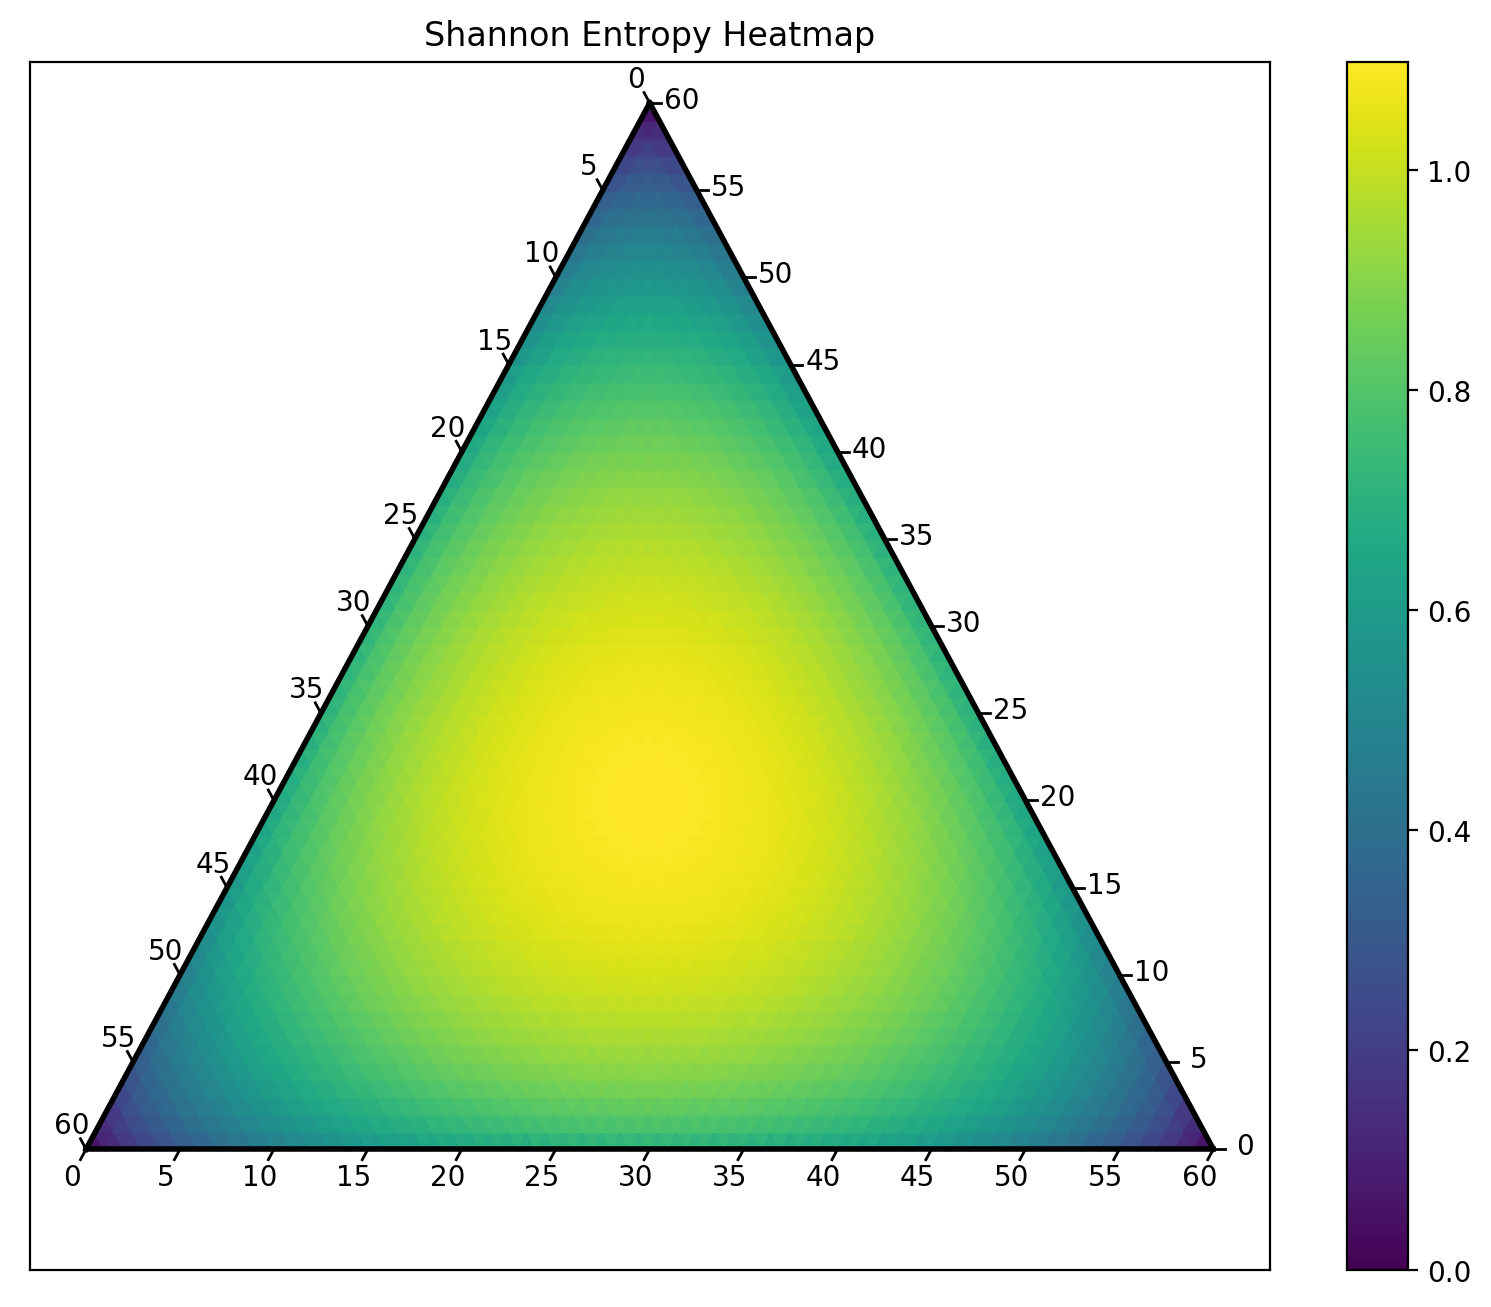

In [8]:
import math

def shannon_entropy(p):
    """Computes the Shannon Entropy at a distribution in the simplex."""
    s = 0.
    for i in range(len(p)):
        try:
            s += p[i] * math.log(p[i])
        except ValueError:
            continue
    return -1. * s

scale = 60
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 8)
tax.heatmapf(shannon_entropy, boundary=True, style="triangular")
tax.boundary(linewidth=2.0)
tax.set_title("Shannon Entropy Heatmap")
tax.ticks(axis='lbr', linewidth=1, multiple=5)
tax.clear_matplotlib_ticks()
tax.show()

You can also make heatmaps of data by specifying the color of each subtriangle or hexagon.

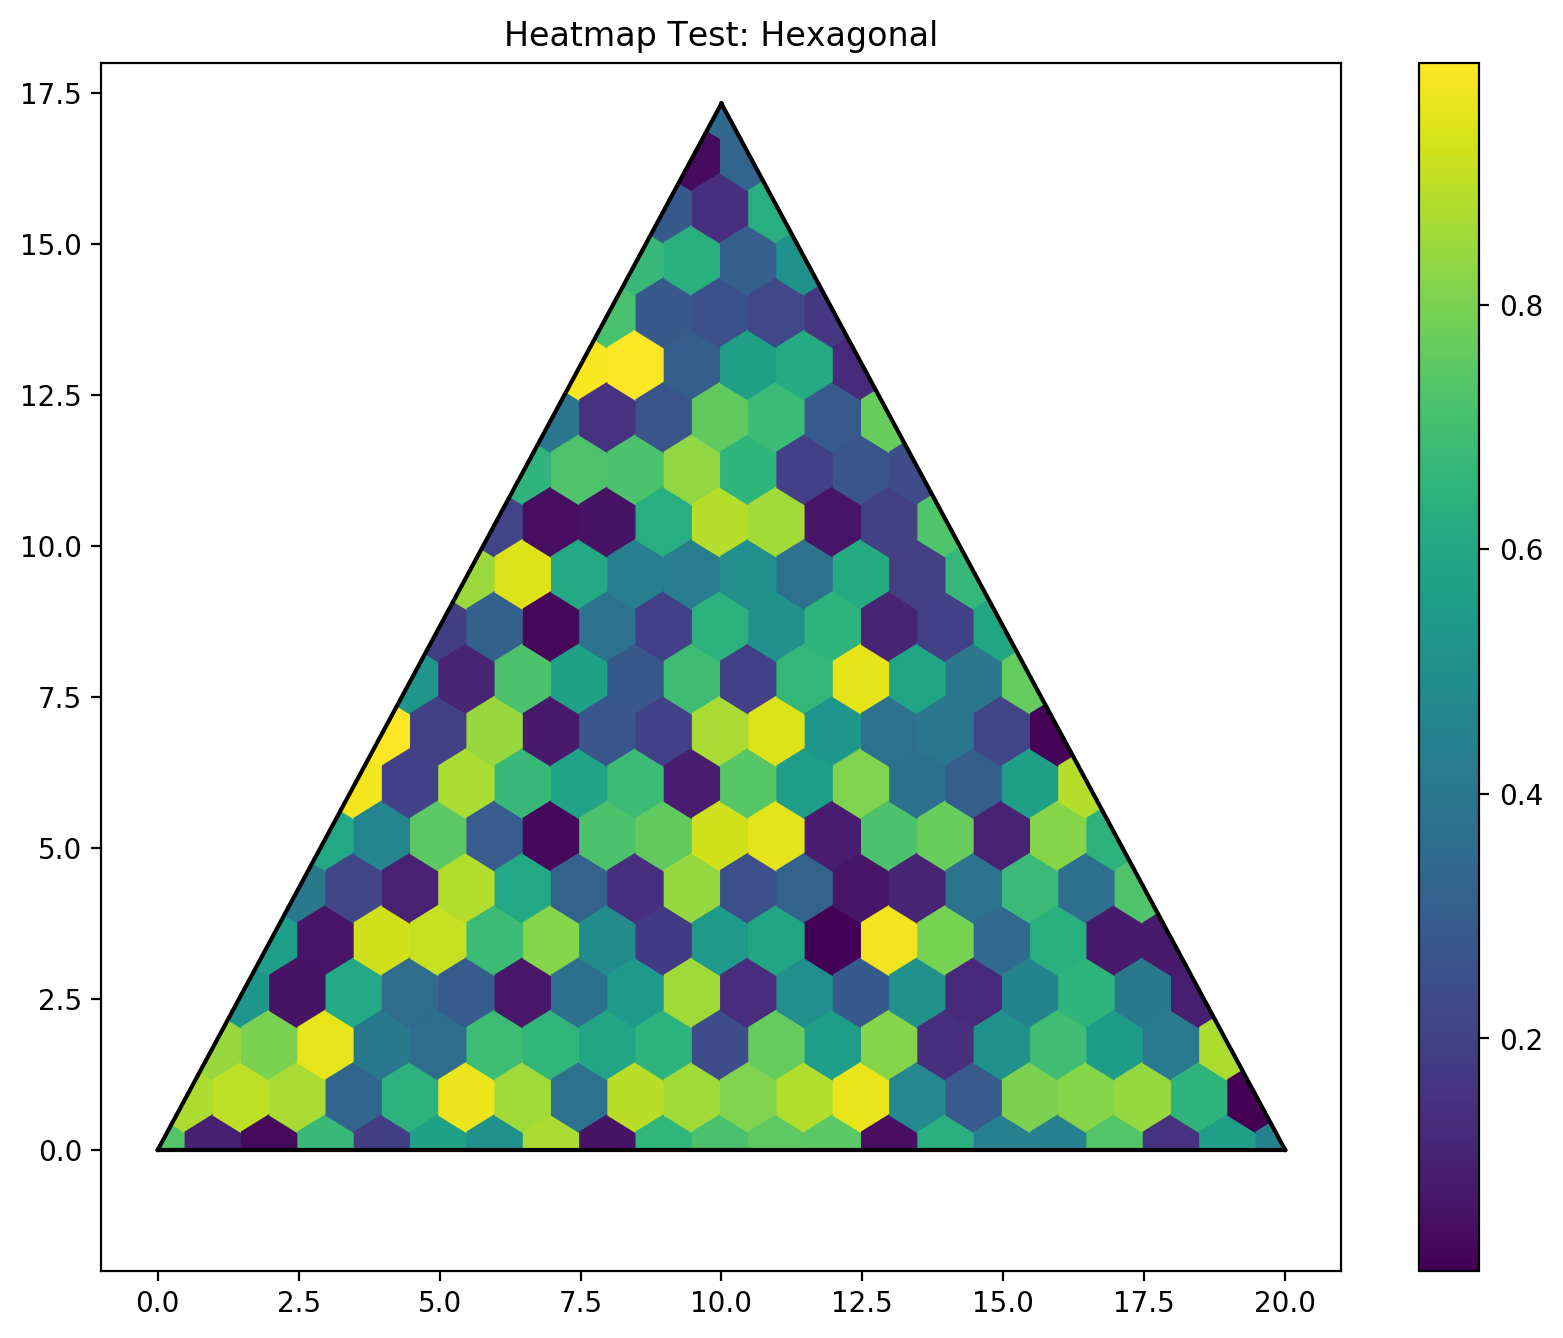

In [9]:
def generate_random_heatmap_data(scale=5):
    from ternary.helpers import simplex_iterator
    d = dict()
    for (i,j,k) in simplex_iterator(scale):
        d[(i,j)] = random.random()
    return d

scale = 20
d = generate_random_heatmap_data(scale)
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 8)
tax.heatmap(d, style="h")
tax.boundary()
tax.set_title("Heatmap Test: Hexagonal")


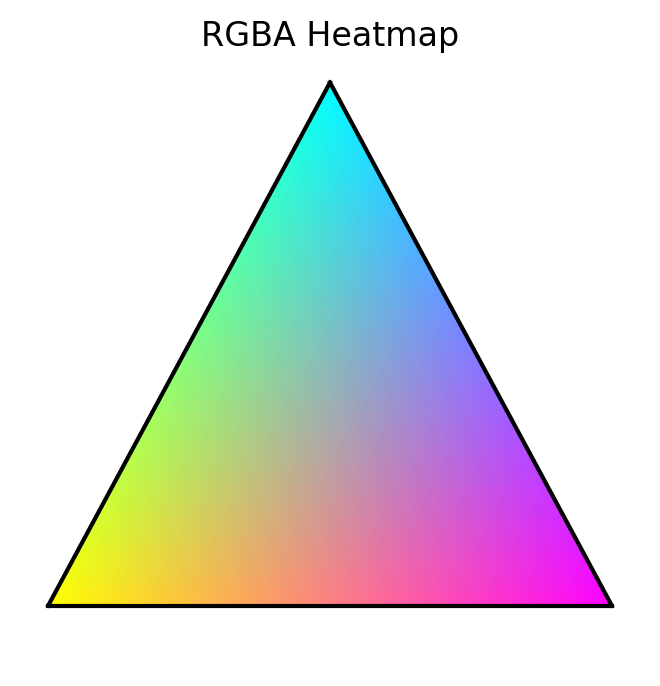

In [10]:
import matplotlib.pyplot as plt

def color_point(x, y, z, scale):
    w = 255
    x_color = x * w / float(scale)
    y_color = y * w / float(scale)
    z_color = z * w / float(scale)
    r = math.fabs(w - y_color) / w
    g = math.fabs(w - x_color) / w
    b = math.fabs(w - z_color) / w
    return (r, g, b, 1.)


def generate_heatmap_data(scale=5):
    from ternary.helpers import simplex_iterator
    d = dict()
    for (i, j, k) in simplex_iterator(scale):
        d[(i, j, k)] = color_point(i, j, k, scale)
    return d

scale = 80
data = generate_heatmap_data(scale)
figure, tax = ternary.figure(scale=scale)
tax.heatmap(data, style="hexagonal", use_rgba=True, colorbar=False)
# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')
tax.boundary()
tax.set_title("RGBA Heatmap")
plt.show()